<a href="https://colab.research.google.com/github/rj22rey/AI-Technology-Project-1/blob/main/Master_Code_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import sys
#!{sys.executable} -m pip install pandas matplotlib seaborn numpy scipy scikit-learn jupyterlab xgboost
# For Windows users:

import zipfile
import io
import requests

#!pip install pandas matplotlib seaborn numpy scipy scikit-learn jupyterlab xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [24]:
import warnings
warnings.filterwarnings('ignore')


# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [25]:
url = "https://raw.githubusercontent.com/rj22rey/AI-Technology-Project-1/main/sales.csv.zip"

# Download the ZIP from GitHub
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

# See what's inside
print(z.namelist())

# Open the real CSV (ignore __MACOSX)
with z.open("sales.csv") as f:
    df = pd.read_csv(f)

df.head()

['sales.csv', '__MACOSX/._sales.csv']


,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,18/04/2013,517,1,0,0,0,4422
1,291687,394,6,11/04/2015,694,1,0,0,0,8297
2,411278,807,4,29/08/2013,970,1,1,0,0,9729
3,664714,802,2,28/05/2013,473,1,1,0,0,6513
4,540835,726,4,10/10/2013,1068,1,1,0,0,10882


In [26]:
df.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,18/04/2013,517,1,0,0,0,4422
1,291687,394,6,11/04/2015,694,1,0,0,0,8297
2,411278,807,4,29/08/2013,970,1,1,0,0,9729
3,664714,802,2,28/05/2013,473,1,1,0,0,6513
4,540835,726,4,10/10/2013,1068,1,1,0,0,10882


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [28]:
df.describe()

,index,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [29]:
print("Sales Statistics:")
print(df['sales'].describe())
print(f"\nMean sales: ${df['sales'].mean():,.2f}")
print(f"Median sales: ${df['sales'].median():,.2f}")
print(f"Sales range: ${df['sales'].min():,.0f} - ${df['sales'].max():,.0f}")

Sales Statistics:
count    640840.000000
mean       5777.469011
std        3851.338083
min           0.000000
25%        3731.000000
50%        5746.000000
75%        7860.000000
max       41551.000000
Name: sales, dtype: float64

Mean sales: $5,777.47
Median sales: $5,746.00
Sales range: $0 - $41,551


In [31]:
missing = df.isnull().sum()
missing_percent = 100 * missing / len(df)


missing_table = pd.DataFrame({
'Missing_Count': missing,
'Missing_%': missing_percent
})


missing_table = (
missing_table[missing_table['Missing_Count'] > 0]
.sort_values('Missing_%', ascending=False)
)


if missing_table.empty:
  print(" No missing values found in the dataset.")
else:
  print(" Columns with missing values (Top 20):")
  display(missing_table.head(20))

 No missing values found in the dataset.


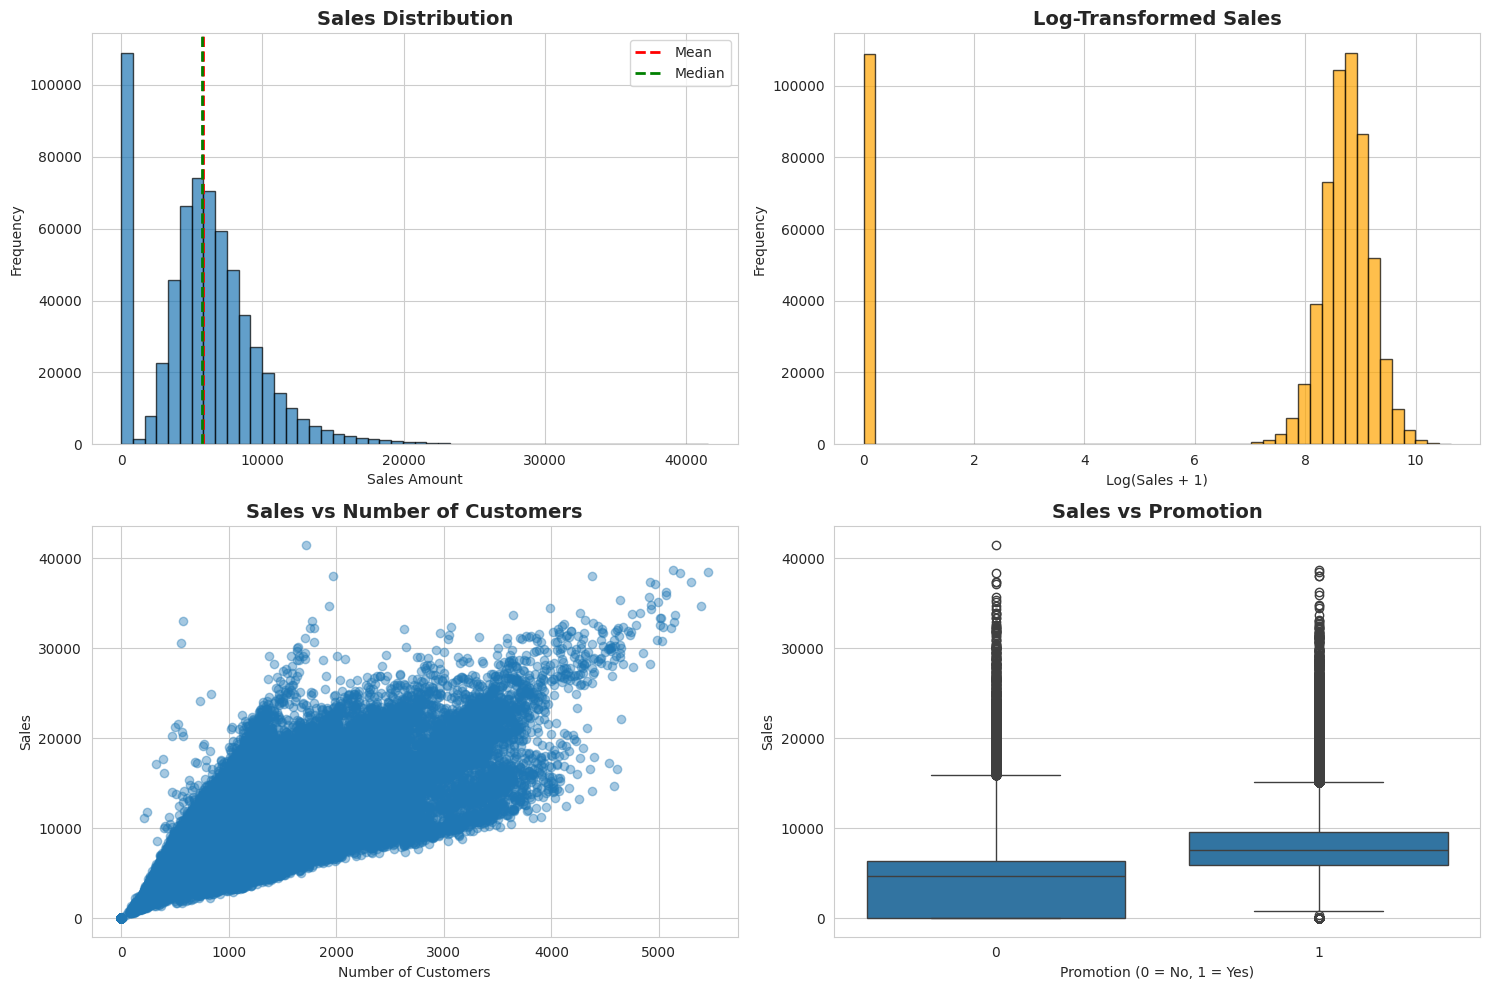

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


# Sales distribution
axes[0, 0].hist(df['sales'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Sales Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sales Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['sales'].mean(), color='red', linestyle='--', label='Mean', linewidth=2)
axes[0, 0].axvline(df['sales'].median(), color='green', linestyle='--', label='Median', linewidth=2)
axes[0, 0].legend()


# Log-transformed sales distribution (optional, helps if data is skewed)
axes[0, 1].hist(np.log1p(df['sales']), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Log-Transformed Sales', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Log(Sales + 1)')
axes[0, 1].set_ylabel('Frequency')


# Sales vs Number of Customers
if 'nb_customers_on_day' in df.columns:
  axes[1, 0].scatter(df['nb_customers_on_day'], df['sales'], alpha=0.4)
  axes[1, 0].set_title('Sales vs Number of Customers', fontsize=14, fontweight='bold')
  axes[1, 0].set_xlabel('Number of Customers')
  axes[1, 0].set_ylabel('Sales')
else:
  axes[1, 0].text(0.5, 0.5, 'nb_customers_on_day not found', ha='center', va='center')


# Sales vs Promotion
if 'promotion' in df.columns:
  sns.boxplot(data=df, x='promotion', y='sales', ax=axes[1, 1])
  axes[1, 1].set_title('Sales vs Promotion', fontsize=14, fontweight='bold')
  axes[1, 1].set_xlabel('Promotion (0 = No, 1 = Yes)')
  axes[1, 1].set_ylabel('Sales')
else:
  axes[1, 1].text(0.5, 0.5, 'promotion not found', ha='center', va='center')


plt.tight_layout()
plt.show()